Link Tableau Dashboard: https://public.tableau.com/views/tableau_sinta-ahwalisa/KeyDriversandAmplifiersofViewerDrop-OffonOver-The-TopOTTStreamingPlatform?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

### i. Introduction

### ii. Problem Identification

#### ii.1 Topic

Analysis of Viewer Drop-Off Drivers and Retention Risk on Over-The-Top (OTT) Streaming Platforms Using Data Visualization and Statistical Methods

#### ii.2 Background 

The rapid growth of Over-The-Top (OTT) streaming platforms has intensified competition in capturing and retaining viewer attention. While content libraries continue to expand, many platforms face persistent challenges related to viewer drop-off, where viewers discontinue watching before completing an episode or season. High drop-off rates negatively affect viewer engagement, content performance evaluation, and long-term subscription value.

Viewer disengagement is influenced by a combination of factors, including content characteristics (such as pacing, narrative hooks, dialogue density, and episode duration), cognitive demands placed on viewers, and viewer interaction behavior during playback (pausing, rewinding, skipping intros). These signals are increasingly captured through digital interaction data, yet they are often underutilized in a systematic analytical framework.

Despite the availability of rich behavioral and content-level data, many OTT platforms lack a data-driven understanding of which factors most strongly contribute to viewer drop-off, when drop-off risk peaks, and how these risks vary across platforms, genres, and content types. This gap highlights the need for structured analysis combining exploratory data visualization and statistical inference to uncover actionable insights and support evidence-based content and retention strategies.

#### ii.3 Problem Statement

S — Specific
OTT streaming platforms generate extensive data on viewer behavior and content attributes, yet often lack integrated statistical analysis and effective visualization to clearly identify the key drivers of viewer drop-off, amplifiers and retention risk.

M — Measurable
Viewer drop-off and retention risk are measured using engagement metrics such as drop-off rate, average watch percentage, watch time %, cognitive load, pacing scores, and viewer interaction signals (e.g., pause and rewind behavior).

A — Achievable
By applying descriptive and inferential statistical methods alongside data visualization techniques, this study can systematically uncover statistically significant relationships between content characteristics, viewer behavior, and engagement outcomes.

R — Relevant
Understanding how content design, cognitive load, and viewer interactions influence engagement is critical for supporting evidence-based decisions in content optimization, guidelines, and long-term viewer retention on OTT platforms.

T — Time-bound / Target-oriented
This study aims to analyze viewer drop-off patterns within the observed dataset and deliver actionable insights that can inform near-term content strategy improvements and ongoing retention optimization efforts.

#### ii.4 Problem Breakdown

##### A. Data Visualization: Descriptive Statistics

**P0:** **Descriptive Profiling of Viewer Behavior and Content Characteristics**

**Q0:** What are the central tendencies and variability of key viewer behavior metrics and content attributes? 

- Descriptive statistics such as mean, median, and standard deviation (stdev) are used to summarize engagement levels, cognitive load, and pacing characteristics, providing baseline insights into overall viewing behavior patterns.

**P1: Viewer Retention Risk Segmentation**

**Q1:** How is viewer retention risk distributed across different behavioral profiles and content categories? 

- This analysis visualizes retention risk levels based on viewer interaction patterns, genres, and platforms to identify high-risk but potentially recoverable viewer segments.

##### B. Data Visualization: Descriptive & Diagnostic

**P2: Content Attribute Influence on Drop-Off**

**Q2:** How are content attributes distributed and how stable are they?

- Visual comparisons are used to reveal patterns and thresholds where content attributes are associated with higher or lower drop-off rates.

**P3: Temporal Patterns of Viewer Drop-Off**

**Q3:** At which points within episodes and seasons does viewer drop-off most frequently occur?

- This analysis visualizes drop-off probability across episode numbers and seasons to detect structural fatigue points and early-warning signals of disengagement.

**P4: Platform and Genre Concentration of Drop-Off**

**Q4:** Where does viewer drop-off concentrate across platforms, genres, and individual titles?

- Heatmaps and comparative charts are used to identify systematic differences and performance outliers that may indicate platform-specific or genre-specific retention challenges.

**P5: Drop-off Risk Profiling**

**Q5:** What characterizes high vs low drop-off?

- This section visualizes and compares viewer behavior and content characteristics between high drop-off and low drop-off.
It highlights differences in engagement (watch percentage), behavioral friction (pause, rewind), and content design attributes (hook strength, pacing, visual intensity) to diagnose patterns associated with elevated or reduced drop-off risk.

##### C. Data Visualization: Inferential Statistics

**P6:** **Statistical Identification of Drop-Off Drivers (Each Features)**

**Q6:** Which features show the strongest relationships with drop-off probability?

Inferential statistical techniques, including correlation analysis, regression-based inference, and confidence interval estimation, are applied to assess the direction, magnitude, and uncertainty of relationships between content attributes, viewer behavior, and drop-off probability. Emphasis is placed on effect size and robustness rather than solely on p-value–based significance testing.

### iii. Data Loading

#### iii.1 Data Source: Kaggle

The dataset used in this analysis contains episode-level viewing behavior and content attributes from Kaggle (https://www.kaggle.com/datasets/eklavya16/ott-viewer-drop-off-and-retention-risk-dataset), including viewer interaction signals, content design metrics, and drop-off outcomes.

##### iii.2 Data Loading: Python

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

In [11]:
# Data Load
df = pd.read_csv("Instagram_Analytics.csv")
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


### iv. Data Exploration and Data Cleaning

In [4]:
# Dataset Shape
df.shape

(29999, 15)

In [5]:
# Columns Name
df.columns

Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category'],
      dtype='object')

In [6]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [7]:
# Data Quality Check: Missing Value
df.isna().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

In [8]:
# Data Quality Check: Duplicate Records
df.duplicated().sum()

np.int64(0)

In [9]:
# Data Numerical Summary
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


**Data Numerical Insight**

1. Summary
- Performance is skewed by outliers
Median engagement (9.2%) is far below the mean (14.4%), meaning typical post performance is overestimated.
- High reach, low interaction
Posts reach ~1M users on average, but engagement indicates mostly passive consumption.
- Results are driven by consistency, not growth
Content formats are standardized and deliver stable results, but follower growth remains incremental.


2. Issues
- Outlier distortion
→ Apply log transformation and winsorization; shift analysis to median and percentiles.
- Shallow engagement measurement
→ Decompose engagement into depth-based metrics (active vs passive engagement).
- Low interpretability of content features
→ Bucket caption length and hashtags; create normalized metrics per reach.


In [12]:
# Handle Extreme Outliers (Winsorization)
def winsorize(series, lower=0.01, upper=0.99):
    return series.clip(
        lower=series.quantile(lower),
        upper=series.quantile(upper)
    )

outlier_cols = [
    "likes", "comments", "shares", "saves",
    "reach", "impressions",
    "followers_gained", "engagement_rate"
]

for col in outlier_cols:
    df[f"{col}_win"] = winsorize(df[col])

In [13]:
# Log Transformation (Skew Reduction)
log_cols = [
    "likes_win", "comments_win", "shares_win",
    "saves_win", "reach_win", "impressions_win",
    "followers_gained_win"
]

for col in log_cols:
    df[f"log_{col}"] = np.log1p(df[col])

In [14]:
# Normalize Engagement Metrics: Engagement per Reach
df["likes_per_10k_reach"] = (df["likes_win"] / df["reach_win"]) * 10000
df["comments_per_10k_reach"] = (df["comments_win"] / df["reach_win"]) * 10000
df["shares_per_10k_reach"] = (df["shares_win"] / df["reach_win"]) * 10000
df["saves_per_10k_reach"] = (df["saves_win"] / df["reach_win"]) * 10000


In [15]:
# Normalize Engagement Metrics: Followers Gained Efficiency
df["followers_per_10k_reach"] = (
    df["followers_gained_win"] / df["reach_win"]
) * 10000

In [ ]:
# Engagement Depth Engineering
df["engagement_depth"] = (
    (df["likes_win"] * 1) +
    (df["comments_win"] * 3) +
    (df["shares_win"] * 4) +
    (df["saves_win"] * 2)
)

In [17]:
# Normalize depth by reach
df["engagement_depth_per_10k_reach"] = (
    df["engagement_depth"] / df["reach_win"]
) * 10000

In [18]:
# Passive vs Active Engagement Ratio
df["active_engagement"] = (
    df["comments_win"] + df["shares_win"] + df["saves_win"]
)

df["passive_engagement"] = df["likes_win"]

df["active_passive_ratio"] = (
    df["active_engagement"] / (df["passive_engagement"] + 1)
)

In [19]:
# Content Feature Bucketing: Caption Length Buckets
df["caption_bucket"] = pd.cut(
    df["caption_length"],
    bins=[-1, 500, 1200, np.inf],
    labels=["short", "medium", "long"]
)

In [20]:
# Hashtag Count Buckets
df["hashtag_bucket"] = pd.cut(
    df["hashtags_count"],
    bins=[-1, 5, 20, np.inf],
    labels=["low", "optimal", "high"]
)

In [21]:
# Performance Segmentation (Quartiles): Engagement Segments
df["engagement_quartile"] = pd.qcut(
    df["engagement_rate_win"],
    q=4,
    labels=["low", "mid-low", "mid-high", "high"]
)

In [22]:
# Performance Segmentation (Quartiles): Reach Tiers
df["reach_tier"] = pd.qcut(
    df["reach_win"],
    q=4,
    labels=["low", "medium", "high", "very_high"]
)

In [23]:
# Flag High Reach but Low Engagement
df["high_reach_low_engagement"] = (
    (df["reach_tier"].isin(["high", "very_high"])) &
    (df["engagement_quartile"].isin(["low", "mid-low"]))
)

In [24]:
# Select Final Analysis-Ready Dataset
analysis_df = df[
    [
        # Core normalized metrics
        "likes_per_10k_reach",
        "comments_per_10k_reach",
        "shares_per_10k_reach",
        "saves_per_10k_reach",
        "followers_per_10k_reach",

        # Engineered metrics
        "engagement_depth_per_10k_reach",
        "active_passive_ratio",

        # Content features
        "caption_bucket",
        "hashtag_bucket",

        # Segments
        "engagement_quartile",
        "reach_tier",
        "high_reach_low_engagement",

        # Log metrics (for stats/models)
        "log_likes_win",
        "log_comments_win",
        "log_shares_win",
        "log_saves_win",
        "log_reach_win"
    ]
]

In [25]:
analysis_df.describe(include="all")

,likes_per_10k_reach,comments_per_10k_reach,shares_per_10k_reach,saves_per_10k_reach,followers_per_10k_reach,engagement_depth_per_10k_reach,active_passive_ratio,caption_bucket,hashtag_bucket,engagement_quartile,reach_tier,high_reach_low_engagement,log_likes_win,log_comments_win,log_shares_win,log_saves_win,log_reach_win
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999,29999,29999,29999,29999,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,long,optimal,low,low,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13572,14447,7509,7500,19075,NaN,NaN,NaN,NaN,NaN
mean,2796.679770,142.969935,71.734845,211.748247,14.357430,3936.025447,0.429248,NaN,NaN,NaN,NaN,NaN,11.213250,8.223623,7.531558,8.621895,13.512758
std,7459.761480,389.273955,195.742811,572.298813,39.296668,9834.122204,1.097261,NaN,NaN,NaN,NaN,NaN,0.956471,0.956881,0.941603,0.955072,0.957247
min,9.771211,0.464373,0.277614,0.765729,0.050475,57.207899,0.001886,NaN,NaN,NaN,NaN,NaN,7.568813,4.532599,4.025352,5.023881,9.910041
25%,506.460466,25.379496,12.544064,37.252844,2.510572,850.034148,0.094615,NaN,NaN,NaN,NaN,NaN,10.814886,7.836567,7.128496,8.213788,13.109647
50%,1000.281225,50.374231,25.080662,74.863401,5.013044,1401.746430,0.150996,NaN,NaN,NaN,NaN,NaN,11.508727,8.525756,7.823646,8.920523,13.807662
75%,2007.513731,100.894000,50.079052,151.536432,10.145463,2817.517906,0.302816,NaN,NaN,NaN,NaN,NaN,11.919896,8.925188,8.234565,9.332115,14.217502


In [26]:
# save file for tableau
df.to_csv("ig-analytics-clean.csv", index=False)

### v. Analysis and Calculations

In [27]:
# Distributional Characteristics and Dispersion Analysis
desc = pd.DataFrame({
    "variance": df.var(numeric_only=True),
    "skewness": df.skew(numeric_only=True),
    "kurtosis": df.kurtosis(numeric_only=True)
})

desc

,variance,skewness,kurtosis
likes,3.353101e+09,0.010201,-1.203356
comments,8.342883e+06,-0.010738,-1.200813
shares,2.097632e+06,0.005787,-1.210511
saves,1.894466e+07,0.003401,-1.220095
reach,3.338420e+11,0.011810,-1.197439
impressions,3.565193e+11,0.012295,-1.063386
caption_length,4.044849e+05,-0.003024,-1.199745
hashtags_count,8.110464e+01,0.018402,-1.216393
followers_gained,8.431127e+04,-0.004265,-1.215077
engagement_rate,8.797281e+02,50.844828,4967.835606


Key Insights

- Core metrics are statistically stable
  Likes, comments, shares, saves, reach, impressions, and content features show near-zero skewness and flat distributions, making them suitable for standard statistical analysis.

- Engagement rate is unreliable as a primary KPI
  It is extremely skewed and heavy-tailed, even after winsorization, and is dominated by rare viral outliers.

- Log transformation works
  Log-scaled likes, reach, impressions, and follower gains show reduced variance and acceptable distributions, making them model-ready.

- Per-reach (normalized) metrics are highly skewed
  Metrics per 10K reach exhibit very high skewness and kurtosis, so they should be analyzed in log space or via percentiles rather than averages.

- Engagement depth is a better engagement proxy
  It is more stable than engagement rate, though its per-reach version still requires robust handling.

- Engagement is mostly passive
  Active–passive engagement ratio is heavily skewed, indicating most posts are like-driven, with truly interactive posts being rare.

- High-reach, low-engagement posts form a valid segment
  This segment is statistically consistent and suitable for targeted diagnostic and optimization analysis.


##### Connect Stat Desc to Tableau

In [30]:
analysis_cols = [
    "likes_per_10k_reach",
    "comments_per_10k_reach",
    "shares_per_10k_reach",
    "saves_per_10k_reach",
    "followers_per_10k_reach",
    "engagement_depth_per_10k_reach",
    "active_passive_ratio",
    "log_likes_win",
    "log_comments_win",
    "log_shares_win",
    "log_saves_win",
    "log_reach_win"
]

In [33]:
# Central tendency
desc_ct = (
    df_numeric
    .describe()               # count, mean, std, min, 25%, 50%, 75%, max
    .T
    .reset_index()
    .rename(columns={"index": "metric"})
)

# Distributional characteristics
df_numeric = df[analysis_cols].apply(pd.to_numeric, errors="coerce")

desc_dist = (
    pd.DataFrame({
        "variance": df_numeric.var(),
        "skewness": df_numeric.skew(),
        "kurtosis": df_numeric.kurtosis()
    })
    .reset_index()
    .rename(columns={"index": "metric"})
)

# MERGE (LEFT JOIN IN PYTHON)
desc_final = desc_ct.merge(
    desc_dist,
    on="metric",
    how="left"
)

desc_final.to_csv("descriptive_statistics_tableau.csv", index=False)

#### v.2 Statistic Inferential

In [35]:
# Statistic Inferential for Tableau
analysis_cols = [
    "likes_per_10k_reach",
    "comments_per_10k_reach",
    "shares_per_10k_reach",
    "saves_per_10k_reach",
    "followers_per_10k_reach",
    "engagement_depth_per_10k_reach",
    "active_passive_ratio"
]
  
df_numeric = df[analysis_cols + [group_col]].copy()

for col in analysis_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors="coerce")

In [37]:
# ANOVA
from scipy.stats import f_oneway

anova_results = []

for metric in analysis_cols:
    groups = [
        grp[metric].dropna().values
        for _, grp in df_numeric.groupby(group_col)
        if grp[metric].notna().sum() > 10
    ]

    if len(groups) >= 2:
        f_stat, p_val = f_oneway(*groups)

        anova_results.append({
            "metric": metric,
            "test": "ANOVA",
            "grouping_variable": group_col,
            "f_statistic": f_stat,
            "p_value": p_val,
            "significant_05": p_val < 0.05
        })

anova_df = pd.DataFrame(anova_results)

C:\Users\sinta\AppData\Local\Temp\ipykernel_34056\1167706356.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, grp in df_numeric.groupby(group_col)


In [38]:
# Correlation Analysis
from scipy.stats import pearsonr

corr_results = []

for i, metric_x in enumerate(analysis_cols):
    for metric_y in analysis_cols[i + 1:]:
        valid = df_numeric[[metric_x, metric_y]].dropna()

        if len(valid) > 30:
            r, p_val = pearsonr(valid[metric_x], valid[metric_y])

            corr_results.append({
                "metric_x": metric_x,
                "metric_y": metric_y,
                "correlation": r,
                "p_value": p_val,
                "significant_05": p_val < 0.05
            })

corr_df = pd.DataFrame(corr_results)

In [39]:
# Group Mean Comparison Table (Effect Direction)
group_means = (
    df_numeric
    .groupby(group_col)[analysis_cols]
    .mean()
    .reset_index()
    .melt(
        id_vars=group_col,
        var_name="metric",
        value_name="group_mean"
    )
)

C:\Users\sinta\AppData\Local\Temp\ipykernel_34056\4044033057.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_col)[analysis_cols]


In [41]:
# Attach Mean Context to ANOVA
anova_final = anova_df.merge(
    group_means,
    on="metric",
    how="left"
)

anova_final.to_csv(
    "inferential_anova_tableau.csv",
    index=False
)

corr_df.to_csv(
    "inferential_correlation_tableau.csv",
    index=False
)

#### v.3 Data Visualization

**P0:** Descriptive Profiling of Viewer Behavior and Content Characteristics

**Q0:** What are the central tendencies and variability of key viewer behavior metrics and content attributes?

In [119]:
# Key Metrics Selection
metrics = [
    "episode_duration_min",
    "avg_watch_percentage",
    "pause_count",
    "rewind_count",
    "cognitive_load",
    "hook_strength",
    "pacing_score",
    "visual_intensity"
]

desc_stats = (
    df[metrics]
    .agg(["mean", "median", "std"])
    .T
    .rename(columns={
        "mean": "Mean",
        "median": "Median",
        "std": "Std_Dev"
    })
)

desc_stats

,Mean,Median,Std_Dev
episode_duration_min,37.660667,33.0,22.899741
avg_watch_percentage,56.805764,57.0,12.577000
pause_count,3.102921,3.0,1.866938
rewind_count,2.003497,2.0,1.548391
cognitive_load,6.196015,7.0,1.322146
hook_strength,5.525158,6.0,1.730098
pacing_score,5.397908,5.0,1.230418
visual_intensity,6.009436,6.0,1.994370


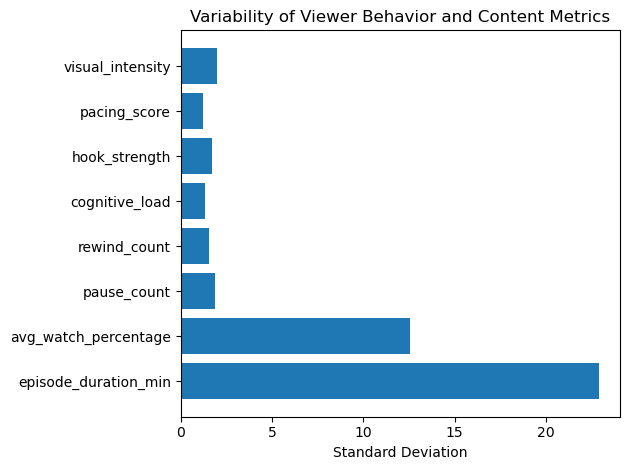

In [120]:
# Variability comparison across metrics
plt.figure()
plt.barh(
    desc_stats.index,
    desc_stats["Std_Dev"]
)
plt.xlabel("Standard Deviation")
plt.title("Variability of Viewer Behavior and Content Metrics")
plt.tight_layout()
plt.show()


Insight:

1. Episode duration shows the highest variability means content length is highly inconsistent across the dataset.
2. Average watch percentage has high variability means viewers commitment is uneven.
3. Behavioural interaction metrics show moderate variability.
4. Content design attributes are relatively stable.

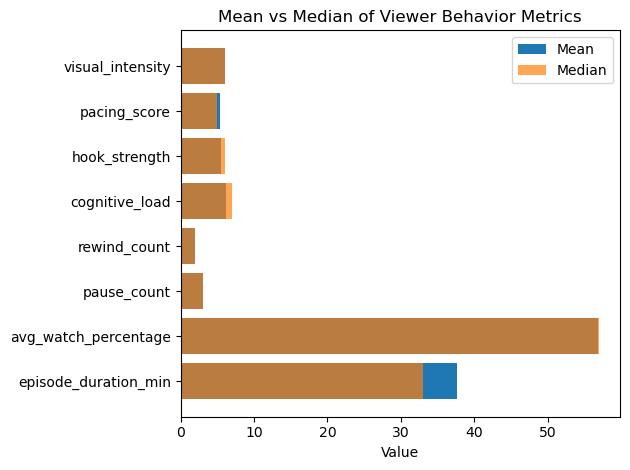

In [121]:
# Central tendencies visualization (mean vs median)
central_df = desc_stats[["Mean", "Median"]]

plt.figure()
plt.barh(central_df.index, central_df["Mean"], label="Mean")
plt.barh(central_df.index, central_df["Median"], alpha=0.7, label="Median")
plt.xlabel("Value")
plt.title("Mean vs Median of Viewer Behavior Metrics")
plt.legend()
plt.tight_layout()
plt.show()

Insight:

1. Strong right-skew in engagement metrics, indicates a long right tail. It distributed unevenly.
2. Episode duration shows moderate skew.
3. Behavioural interaction metrics are low and skewed. Means rarely viewers pause or rewind, but when friction occurs, it is concentrated in spesific episodes.
4. Content design attributes are relatively symetric. 

**P1:** Viewer Retention Risk Segmentation

**Q1:** How is viewer retention risk distributed across behavioral profiles and content categories?


In [122]:
# Risk segmentation
df["retention_risk_segment"] = pd.qcut(
    df["drop_off_probability"],
    q=[0, 0.33, 0.66, 1.0], # using quantile-based binning
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

# Distribution check
df["retention_risk_segment"].value_counts(normalize=True)

retention_risk_segment
High Risk      0.338790
Low Risk       0.332550
Medium Risk    0.328661
Name: proportion, dtype: float64

Insight: viewer retention risk was segmented using quantile-based thresholds, resulting in approximately equal-sized low, medium, and high risk groups.  Resulting in balanced group sizes that enable robust comparison of behavioral and content characteristics across risk levels.

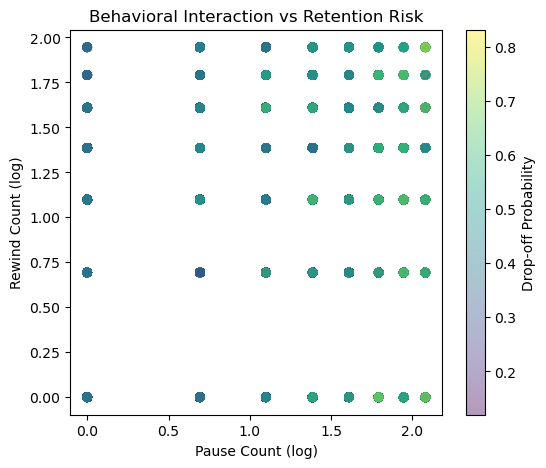

In [123]:
# Behavioral scatter
plt.figure(figsize=(6,5))
plt.scatter(
    df["pause_count_log"],
    df["rewind_count_log"],
    c=df["drop_off_probability"],
    alpha=0.4
)
plt.colorbar(label="Drop-off Probability")
plt.xlabel("Pause Count (log)")
plt.ylabel("Rewind Count (log)")
plt.title("Behavioral Interaction vs Retention Risk")
plt.show()

Insight:
1. **Higher pauses + higher rewinds = higher drop-off risk**. This indicates that when viewers are frequently pausing and rewinding, they are not engaged, they are struggling.
2. **Low interaction ≠ low risk**. Shows lower drop-off but not zero. This indicates that some viewers drop-off quitely without interacting at all (passive disengagement).
3. **The "danger zone" is consistently show high drop-off probability**. Clusters around: Pause Count (log) ≈ 1.5-2.0 and Rewind Count (log) ≈ 1.5-2.0. This may indicates dense information, poor pacing, weak visual guidance, unclear narrative structure.

**P2:** Content Attribute Distribution Analysis

**Q2:** How are content attributes distributed and how stable are they?

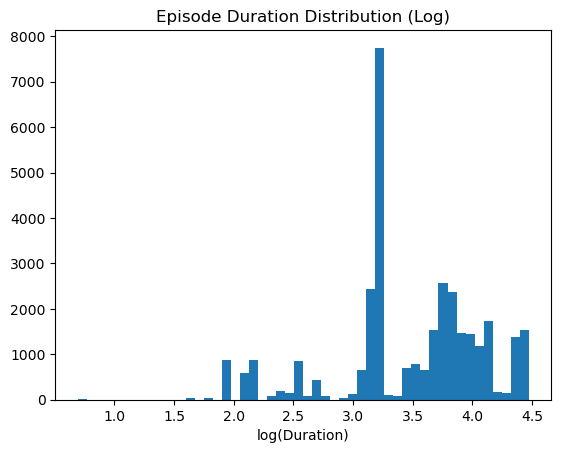

In [124]:
# Duration distribution
plt.hist(df["episode_duration_log"], bins=50)
plt.title("Episode Duration Distribution (Log)")
plt.xlabel("log(Duration)")
plt.show()

Insight:

1. **Strong clustering (standardized content lengths)**. There is a narrow peak around log(Duration) ≈ 3.0-3.1. This indicates that most episodes have very similar durations likely reflects standardized episode formats.
2. **Multi-modal distribution (multiple log(Duration) clusters)** due to short-form episodes, standard TV-length episodes, and long-form episodes such as documentaries, movies, etc.
3. **Right-skew still exists** (even after log transformation) because there is still a right tail and extremely long content (real, not data errors). So we don't have to treating them as noise (would be misleading).
4. **Log transform was the correct choice** as it confirms data is heavy-tailed and improves model stability and interpretability.

**P3:** Temporal Patterns of Viewer Drop-off

**Q3:** At which points within episodes and seasons does viewer drop-off most frequently occur?

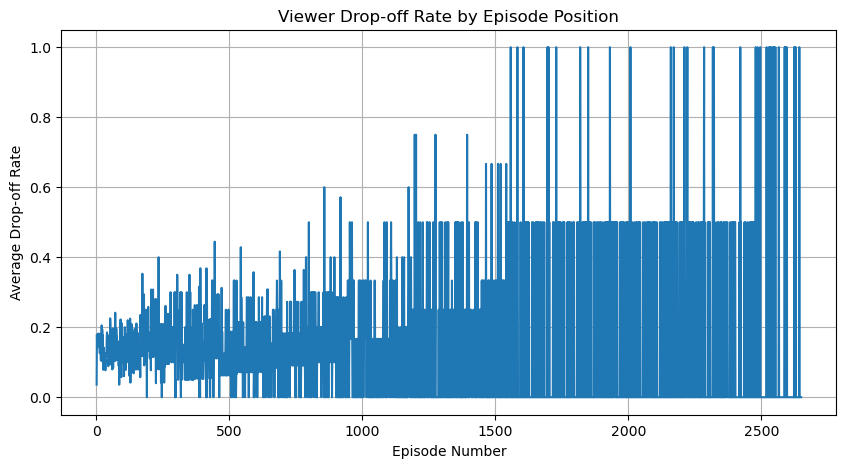

In [125]:
# Drop-off Rate by Episode Number (season is deleted since it's constant)
episode_dropoff = (
    df.groupby("episode_number", as_index=False)
      .agg(
          dropoff_rate=("drop_off", "mean"),
          total_views=("drop_off", "count")
      )
)

plt.figure(figsize=(10, 5))
plt.plot(
    episode_dropoff["episode_number"],
    episode_dropoff["dropoff_rate"]
)
plt.xlabel("Episode Number")
plt.ylabel("Average Drop-off Rate")
plt.title("Viewer Drop-off Rate by Episode Position")
plt.grid(True)
plt.show()

Insight:

1. **Early episodes (episode 1-~800) relatively stable retention** (clusters around ~0.10-0.25). Meaning early retention is not the main retention problem.
2. **Mid-range episodes (episode ~801-~1.600) = rising volatility** (higher average drop-off (~0.30-0.50)), it becomes less predictable, content redudancy liekly begin here, viewer commitments weakens.
3. **Late episodes (~1.601-~2.600) = structural retention collapse** (Drop-off frequently approaching 1.0 which is near total abondenment). It has extreme volatility and are rarely reached and often abondoned quickly when reached.

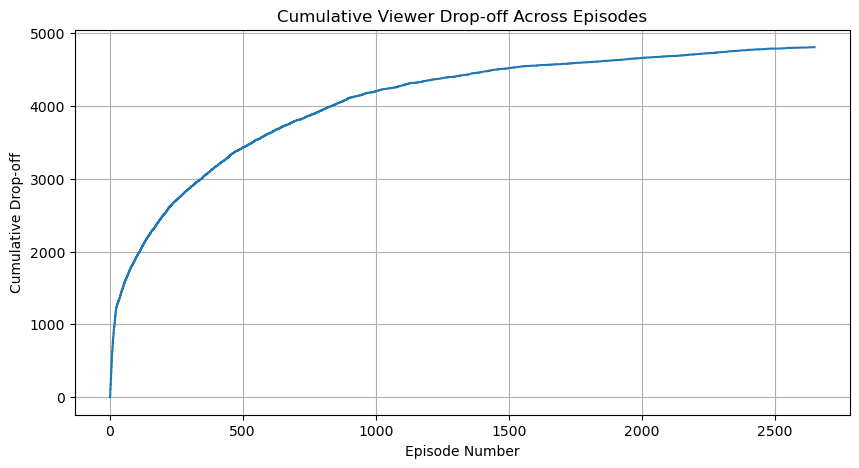

In [126]:
# Cumulative Drop-off Curve (Retention Decay)
df_sorted = df.sort_values("episode_number")

df_sorted["cumulative_dropoff"] = df_sorted["drop_off"].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(
    df_sorted["episode_number"],
    df_sorted["cumulative_dropoff"]
)
plt.xlabel("Episode Number")
plt.ylabel("Cumulative Drop-off")
plt.title("Cumulative Viewer Drop-off Across Episodes")
plt.grid(True)
plt.show()

Insight:

1. **Very steep increase at the beginning** → early to mid-episode range are critical (low drop-off rate x large audience = high total loss).
2. **Clear inflection point** → after the initial steep climb, the curve starts to flatten. Around the mid-episodes range, incremental drop-off per episode starts to decline. This means viewers who survive early episodes are more committed and less likely to churn immediately.
3. **Long, flattening tail** → late episodes contribute relatively little to total cumulative drop-off cause are reached by very few viewers.

**P4:** Platform and Genre Concentration of Drop-Off

**Q4:** Where does viewer drop-off concentrate across platforms, genres, and individual titles?

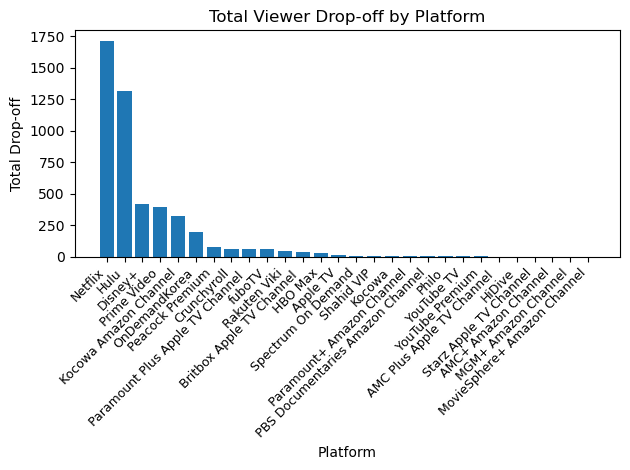

In [127]:
# Drop-off concentration by Platform
platform_dropoff = (
    df.groupby("platform", as_index=False)
      .agg(
          avg_dropoff=("drop_off", "mean"),
          total_dropoff=("drop_off", "sum"),
          episode_count=("drop_off", "count")
      )
      .sort_values("total_dropoff", ascending=False)
)

plt.figure()
plt.bar(platform_dropoff["platform"], platform_dropoff["total_dropoff"])
plt.xlabel("Platform")
plt.ylabel("Total Drop-off")
plt.title("Total Viewer Drop-off by Platform")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

Insight:

1. **Drop-off is highly concentrated** (long-tail distribution). Netflix is the biggest contributors, followed by Hulu, and Disney+. After top ~5 platforms, the bars drop sharply and flatten.
2. **Top platforms ≠ worst platforms** (high total drop-off does not reflects poor platform quality).
3. **Long tail platforms have minimal impact** (optimization effort here has low ROI). Fixing a 1% drop-off reduction on Netflix >> fixing 10% on a niche platforms).
4. **Platform strategy must be weighted by reach**, not rate alone.

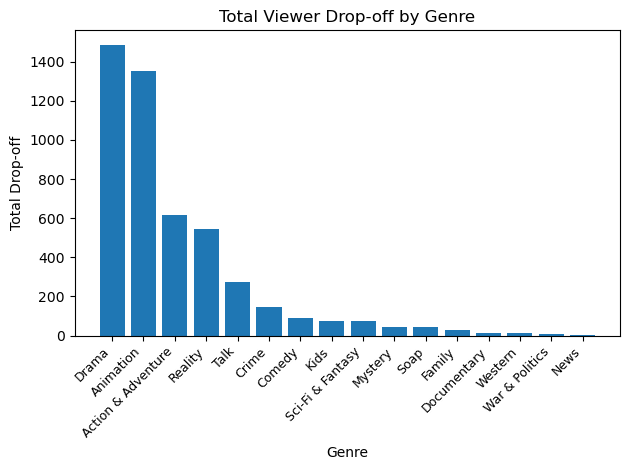

In [128]:
# Drop-off concentration by Genre
genre_dropoff = (
    df.groupby("genre", as_index=False)
      .agg(
          avg_dropoff=("drop_off", "mean"),
          total_dropoff=("drop_off", "sum"),
          episode_count=("drop_off", "count")
      )
      .sort_values("total_dropoff", ascending=False)
)

plt.figure()
plt.bar(genre_dropoff["genre"], genre_dropoff["total_dropoff"])
plt.xlabel("Genre")
plt.ylabel("Total Drop-off")
plt.title("Total Viewer Drop-off by Genre")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.tight_layout()
plt.show()


Insight:

1. **Drop-off is heavily concentrated in just few genres**, after top ~4 genres, drop-off declines sharply.
2. **High drop-off genres align with high consumption genres** (it reflects high exposure not necessarily poor content quality) → churn is volume driven.
3. **Long tail genres contribute marginally** (even if their drop-off rates are high, their absolute impact is pretty small → limited overall retention gains).
4. **Retention leverage lies in mainstream genres**.

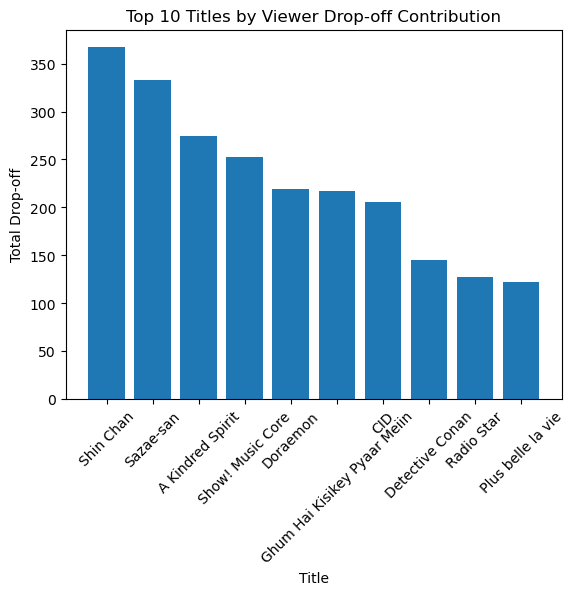

In [129]:
# Drop-off concentration by Individual Title (Top Contributors)
title_dropoff = (
    df.groupby("title", as_index=False)
      .agg(
          total_dropoff=("drop_off", "sum"),
          avg_dropoff=("drop_off", "mean")
      )
      .sort_values("total_dropoff", ascending=False)
      .head(10)
)

plt.figure()
plt.bar(title_dropoff["title"], title_dropoff["total_dropoff"])
plt.xlabel("Title")
plt.ylabel("Total Drop-off")
plt.title("Top 10 Titles by Viewer Drop-off Contribution")
plt.xticks(rotation=45)
plt.show()

Insight:

1. **Drop-off is highly concentrated at the title level** → a small set of titles contributes disproportionately to total viewer drop-off.
2. **High drop-off does not imply low-quality titles** → their driven by volume.
3. **Steep fall after top 3-4 titles contributors**, this indicates potato behaviour (80/20 patterns).
4. **Title-level optimization has high leverage**.

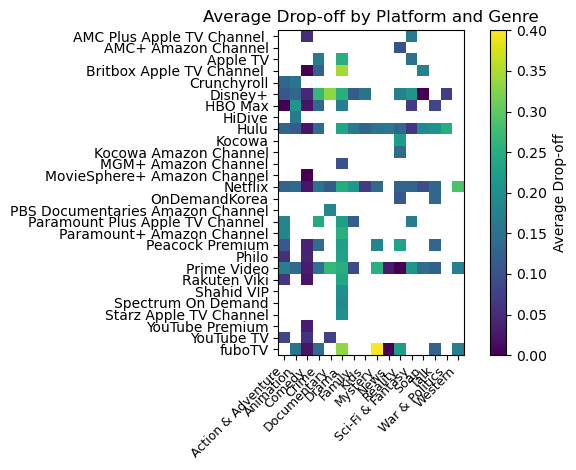

In [130]:
# Platform × Genre Heatmap
pivot_pg = (
    df.pivot_table(
        index="platform",
        columns="genre",
        values="drop_off",
        aggfunc="mean"
    )
)

plt.figure()
plt.imshow(pivot_pg)
plt.colorbar(label="Average Drop-off")
plt.xticks(range(len(pivot_pg.columns)), pivot_pg.columns, rotation=45)
plt.yticks(range(len(pivot_pg.index)), pivot_pg.index)
plt.title("Average Drop-off by Platform and Genre")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.tight_layout()
plt.show()

Insight:

1. **Drop-off is not uniform across platforms**.
2. **Mainstream genres show consistent mid to high drop-off**.
3. **Niche genres are more platform-sensitive**.
4. **Churn risk is driven by spesific pairings**, such as high risk platform x genre.

**P5:** Drop-off Risk Profiling

**Q5:** What characterizes high vs low drop-off group?

In [131]:
# Define High vs Low Drop-off Episodes
high_threshold = df["drop_off_probability"].quantile(0.75)
low_threshold = df["drop_off_probability"].quantile(0.25)

df["dropoff_group"] = "Mid"

df.loc[df["drop_off_probability"] >= high_threshold, "dropoff_group"] = "High Drop-off"
df.loc[df["drop_off_probability"] <= low_threshold, "dropoff_group"] = "Low Drop-off"

In [132]:
# Descriptive comparison table (Mean & Median)
profile_features = [
    "avg_watch_percentage",
    "pause_count",
    "rewind_count",
    "skip_intro",
    "hook_strength",
    "pacing_score",
    "visual_intensity",
    "episode_duration_min"
]

profile_summary = (
    df[df["dropoff_group"] != "Mid"]
    .groupby("dropoff_group")[profile_features]
    .agg(["mean", "median"])
)

profile_summary

avg_watch_percentage        pause_count        rewind_count  \
                              mean median        mean median         mean   
dropoff_group                                                               
High Drop-off            40.947671   42.0    4.146929    4.0     2.031254   
Low Drop-off             71.700251   71.0    2.232422    2.0     1.973857   

                     skip_intro        hook_strength        pacing_score  \
              median       mean median          mean median         mean   
dropoff_group                                                              
High Drop-off    2.0   0.786373    1.0      4.435636    4.0     4.432164   
Low Drop-off     2.0   0.109825    0.0      6.911305    7.0     6.133341   

                     visual_intensity        episode_duration_min         
              median             mean median                 mean median  
dropoff_group                                                             
High Drop-off    4.0         6.047659    6.0            37.876542   35.0  
Low Drop-off     6.0         5.974334    6.0            37.675063   31.0

<Figure size 640x480 with 0 Axes>

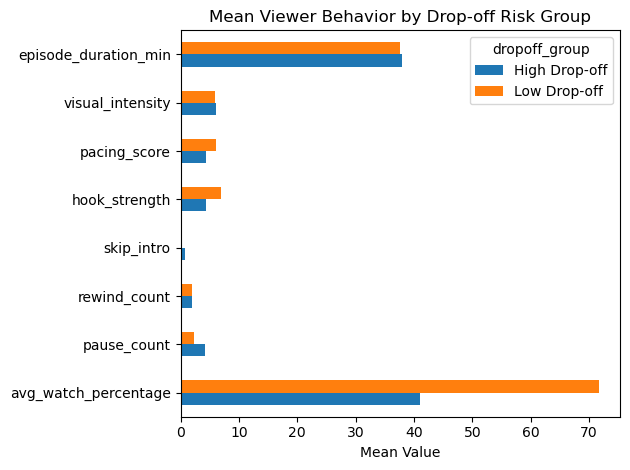

In [133]:
# Mean comparison visualization (High vs Low Drop-off)
mean_comparison = (
    df[df["dropoff_group"] != "Mid"]
    .groupby("dropoff_group")[profile_features]
    .mean()
    .T
)

plt.figure()
mean_comparison.plot(kind="barh")
plt.xlabel("Mean Value")
plt.title("Mean Viewer Behavior by Drop-off Risk Group")
plt.tight_layout()
plt.show()

Insight:

1. Engagement is the strongest differentiator → low drop-off episodes have much higher average watch percebtage.
2. Behavioural friction signals cluster is high drop-off episodes → higher drop-off episodes show higher pause and rewind counts.
3. Content structure matters more than episode length → episode duration is relatively similar across both groups. However, hook strength and pacing scores are consistently higher in low drop-off episodes.

<Figure size 640x480 with 0 Axes>

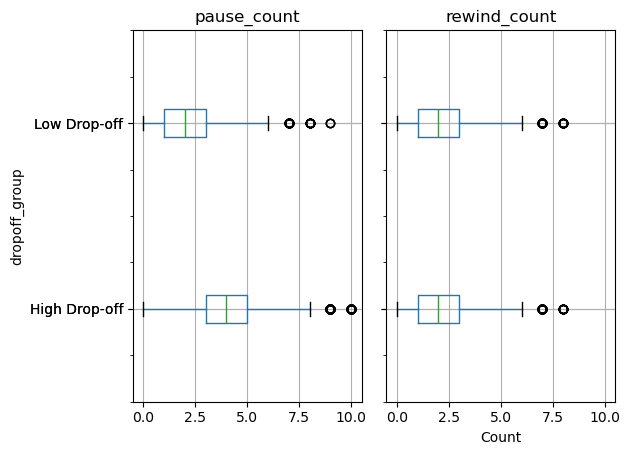

In [134]:
# Behavioral friction focus (Pause & Rewind)
plt.figure()
df[df["dropoff_group"] != "Mid"].boxplot(
    column=["pause_count", "rewind_count"],
    by="dropoff_group",
    vert=False
)
plt.suptitle("")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

Insight:

1. High drop-off episodes show higher behavioural friction → viewers are more likely to stop, hestitate, or replay before disengaging.
2. Interaction  variability is greater in high drop-off episodes → wider interquartile range and more extreme outliers in the high drop-off group suggest inconsistent viewer experiences.
3. Low drop-off episodes cluster at lower pause and rewind values.

<Figure size 640x480 with 0 Axes>

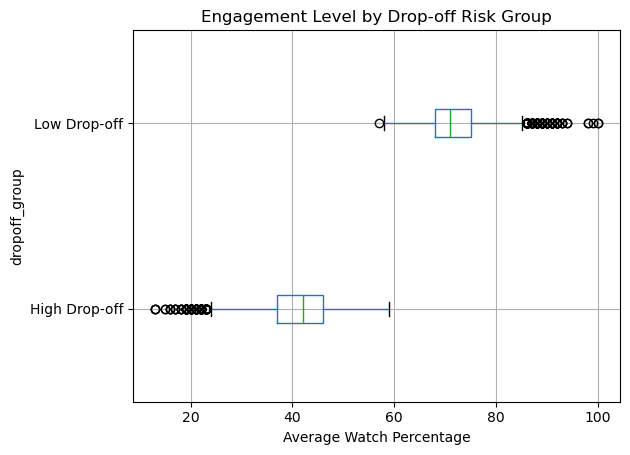

In [135]:
# Engagement contrast (Average Watch Percentage)
plt.figure()
df[df["dropoff_group"] != "Mid"].boxplot(
    column="avg_watch_percentage",
    by="dropoff_group",
    vert=False
)
plt.title("Engagement Level by Drop-off Risk Group")
plt.suptitle("")
plt.xlabel("Average Watch Percentage")
plt.tight_layout()
plt.show()

Insight:

1. Engagement sharply seperates high vs low drop-off episodes.
2. High drop-off episodes fail early and consistently.
3. Low drop-off episodes maintain momentum with upside potential.

<Figure size 640x480 with 0 Axes>

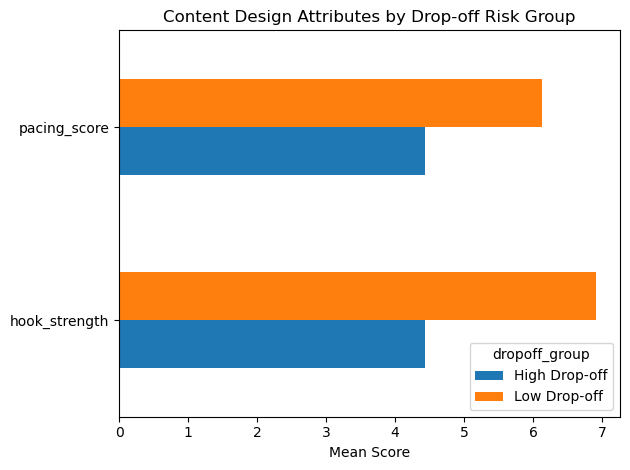

In [136]:
# Content design consistency (Hook & Pacing)
design_metrics = ["hook_strength", "pacing_score"]

design_means = (
    df[df["dropoff_group"] != "Mid"]
    .groupby("dropoff_group")[design_metrics]
    .mean()
    .T
)

plt.figure()
design_means.plot(kind="barh")
plt.xlabel("Mean Score")
plt.title("Content Design Attributes by Drop-off Risk Group")
plt.tight_layout()
plt.show()

Insight:

1. Strong hooks significantly reduce drop-off risk → effective opening is critical for retaining viewers.
2. Effective pacing differentiates retention outcomes.
3. Content structure matters more than external factors → are controllable, high-impact levers for reducing drop-off risk.

C:\Users\sinta\AppData\Local\Temp\ipykernel_31352\3946442140.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


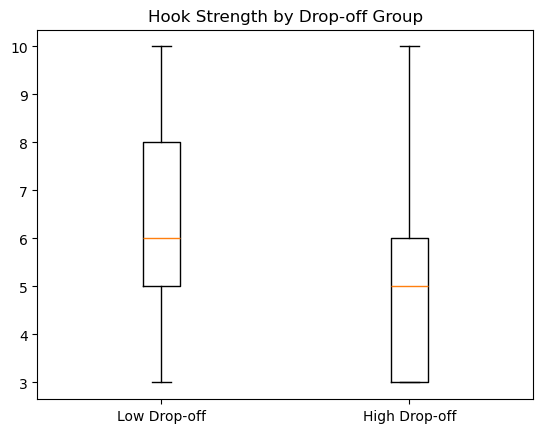

In [137]:
# Boxplot: hook strength by drop-off group 
plt.boxplot(
    [low_drop["hook_strength"], high_drop["hook_strength"]],
    labels=["Low Drop-off", "High Drop-off"]
)
plt.title("Hook Strength by Drop-off Group")
plt.show()

Insight:

1. **Clear median gap** → hook strength matters
- Low Drop-off group (Median ≈ 6)
- High Drop-off group (Median ≈ 5)
This implies stronger hooks are systematically associated with lower drop-off.

2. **Distribution overlap exists between the 2 groups**. This implies hook strength is necessary but not sufficient. It does not guarantee retention on its own.

3. **High Drop-off group shows weaker lower tail**
- Low Drop-off group (Lower quartile ≈ 5)
- High Drop-off group (Lower quartile ≈ 3).
This implies very weak hooks almost never survive. Once hook strength drops below a certain threshold, drop-off risk spikes.

4. **Upper tail similarity** → both groups can reach hook strength ≈ 9-10.
Meaning beyond a certain point, increasing hook strength does not eliminate drop-off. We need to take over other factors as well such as pacing, duration, and cognitive load. 

**P6:** Drop-Off Drivers (Each Features)

**Q6:** Which features show the strongest relationships with drop-off probability?

In [138]:
# Spearman Inferential Correlation
features = [
    "episode_duration_min",
    "avg_watch_percentage",
    "pause_count",
    "rewind_count",
    "skip_intro",
    "cognitive_load",
    "hook_strength",
    "pacing_score",
    "visual_intensity"
]

results = []

for f in features:
    rho, pval = spearmanr(
        df[f],
        df["drop_off_probability"],
        nan_policy="omit"
    )

    results.append({
        "Feature": f,
        "Spearman_rho": rho,
        "p_value": pval,
        "Effect_Direction": "Positive" if rho > 0 else "Negative",
        "Effect_Strength": abs(rho)
    })

corr_df = pd.DataFrame(results)

# Multiple testing correction (inferential rigor)
corr_df["p_adj_fdr"] = multipletests(
    corr_df["p_value"],
    method="fdr_bh"
)[1]

corr_df["Significant"] = corr_df["p_adj_fdr"] < 0.05

# Sort by absolute effect size (strongest signals first)
corr_df = corr_df.sort_values(
    "Effect_Strength",
    ascending=False
)

corr_df

,Feature,Spearman_rho,p_value,Effect_Direction,Effect_Strength,p_adj_fdr,Significant
1,avg_watch_percentage,-0.954913,0.000000,Negative,0.954913,0.000000,True
5,cognitive_load,0.782840,0.000000,Positive,0.782840,0.000000,True
7,pacing_score,-0.545446,0.000000,Negative,0.545446,0.000000,True
6,hook_strength,-0.529427,0.000000,Negative,0.529427,0.000000,True
4,skip_intro,0.465243,0.000000,Positive,0.465243,0.000000,True
2,pause_count,0.404564,0.000000,Positive,0.404564,0.000000,True
3,rewind_count,0.014622,0.007740,Positive,0.014622,0.009951,True
8,visual_intensity,0.012110,0.027415,Positive,0.012110,0.030842,True
0,episode_duration_min,0.006141,0.263402,Positive,0.006141,0.263402,False


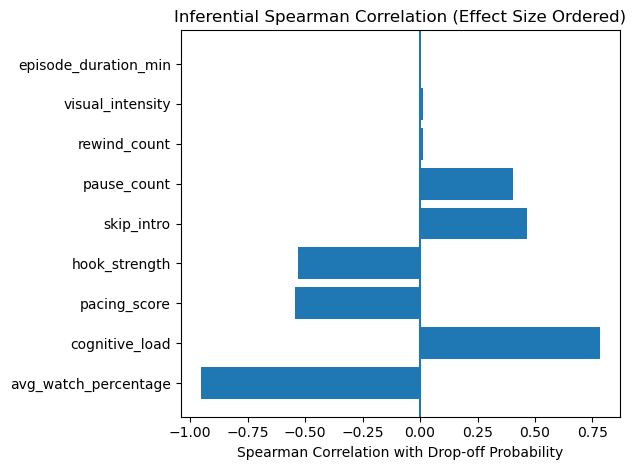

In [139]:
# Spearman Inferential Correlation Visual
plt.figure()
plt.barh(
    corr_df["Feature"],
    corr_df["Spearman_rho"]
)
plt.axvline(0)
plt.xlabel("Spearman Correlation with Drop-off Probability")
plt.title("Inferential Spearman Correlation (Effect Size Ordered)")
plt.tight_layout()
plt.show()

Insight:

- **Strong positive drivers of drop off**:

    1. Cognitive Load (~+0.75 to +0.80) → strongest positive correlation. This means overly complex, dense, or mentally demanding content significantly increases Drop-off risk.

    2. Pause Count (~+0.45) → moderate to strong correlation. This imply frequent pausing is a behavioural signal of audience' friction or confusion.

- **Weak effects** → these feature below do not meaningfully influence Drop-off on their own:

    3. Rewind Count (~+0.05)

    4. Visual Intensity (~+0.02)

    5. Episode Duration in Minutes (~0)

- **Strong negative** → high leverage to substantially reduce Drop-off probability:

    6. Hook Strength (~-0.50)

    7. Pacing Score (~-0.55)

- **Strongest retention**:

    8. Average Watch Percentage (~-0.90) → Useful for monitoring throughout audiences' journey (momentum metric).

### vi. Conclusion

Viewer drop-off represents a critical risk to content performance, yet it is often treated as an isolated episode-level issue rather than a systemic behavioral and structural phenomenon. Without a clear understanding of how engagement patterns, content design, timing, and context interact, retention efforts remain reactive and inefficient. This analysis seeks to move from surface-level observation to structured diagnosis and statistical validation of the true drivers of viewer drop-off.

**Q1** establishes that viewer retention risk is unevenly distributed, with drop-off clustering within specific behavioral and content profiles rather than occurring randomly across the catalog. This segmentation reveals that a relatively small subset of episodes contributes disproportionately to overall churn.

Building on this, **Q2** examines whether content characteristics explain these risk clusters and finds that content structure, particularly hook strength and pacing relates more closely to drop-off behavior than episode duration or visual intensity. This shifts the focus from content length to content design quality.

**Q3** then adds a temporal lens, showing that viewer drop-off concentrates early in the viewing journey. While later episodes exhibit higher drop-off rates, their impact on total churn is limited due to survivor effects. This highlights early engagement as the 

 critical intervention window.

**Q4** expands the analysis contextually, demonstrating that drop-off concentrates within specific platform–genre–title combinations rather than being uniformly distributed. This indicates that retention risk is shaped by both content and delivery context.

With these patterns established, **Q5** profiles high vs low drop-off episodes and shows that high-risk episodes consistently exhibit lower engagement momentum, higher behavioral friction, and weaker content design, while low-risk episodes maintain smooth viewing flow and sustained engagement. Episode length remains a weak differentiator.

Finally, **Q6** statistically validates these observations, confirming that engagement reduces drop-off risk, behavioral friction increases it, and hook strength and pacing act as significant protective factors. These associations are consistent and not attributable to random variation.

Given these, viewer drop-off is not driven by content length or randomness, but by early engagement decay amplified by weak content design and behavioral friction, with risk concentrating in specific temporal and contextual settings. Strengthening early hooks, improving pacing, and reducing friction offer the most effective and scalable levers to improve retention.

**Actionable Recommendations**


**Priority 1:** **Fix Early Engagement Declining** |

Actions:

- Redesign **opening hooks** for high-risk episodes (top 20% drop-off risk).
- Launch a **15–30 second engagement checkpoint** to validate clarity and momentum.
- A/B test hook variations on high-risk titles.

Why:
From Q3 + Q5 we know that most churn happens early thus, hooks are a statistically validated protective factor (Q6).

Expected impact:
Immediate reduction in early-session drop-off.


**Priority 2:** **Use Behavioral Friction as Early Warning Signal** | 

Actions:

- Real time monitor **pause_count and rewind_count spikes**.
- Flag episodes exceeding historical friction thresholds.
- Trigger rapid content review or pacing adjustments.

Why:
Behavioral friction consistently precedes disengagement (Q2, Q5, Q6).

Expected impact:
Prevent drop-off initially before it amplified drop-off.


**Priority 3:** **Genre and Title-Level Optimization** | 

Actions:

- Segment 90s animation as a dedicated nostalgic category and identify slow-burn dramas.
- Establish exposure guidelines for high-visibility and intense-dialogue titles
- Develop a balanced framework for dialogue density and visual intensity

Why:
Viewer engagement patterns vary significantly by genre, narrative pacing, and sensory load (dialogue density and visual intensity). Applying uniform exposure and pacing rules across all titles increases the risk of early viewers' fatigue, cognitive overload, or mismatched expectations, which directly contributes to inconsistent watch depth and premature drop-off.

Expected impact:
More stable watch behavior across genres, reduced volatility in drop-off patterns, and more consistent engagement at scale.